In [101]:
import os
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn import metrics

from sklearn import model_selection

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [102]:
rooth_path = '../rawdata/proc_data/'
df_train_gearbox = pd.read_csv(rooth_path + 'df_train_gearbox.csv')
df_train_gen = pd.read_csv(rooth_path + 'df_train_gen.csv')
df_train_gen_bear = pd.read_csv(rooth_path + 'df_train_gen_bear.csv')
df_train_hyd = pd.read_csv(rooth_path + 'df_train_hyd.csv')
df_train_transf = pd.read_csv(rooth_path + 'df_train_transf.csv')

In [103]:
df_test_gen = pd.read_csv(rooth_path + 'df_test_gen.csv')
df_test_gearbox = pd.read_csv(rooth_path + 'df_test_gearbox.csv')
df_test_gen_bear = pd.read_csv(rooth_path + 'df_test_gen_bear.csv')
df_test_hyd = pd.read_csv(rooth_path + 'df_test_hyd.csv')
df_test_transf = pd.read_csv(rooth_path + 'df_test_transf.csv')

In [104]:
df_train_gearbox['Timestamp'] = pd.to_datetime(df_train_gearbox['Timestamp'])
df_train_gen['Timestamp'] = pd.to_datetime(df_train_gen['Timestamp'])
df_train_gen_bear['Timestamp'] = pd.to_datetime(df_train_gen_bear['Timestamp'])
df_train_hyd['Timestamp'] = pd.to_datetime(df_train_hyd['Timestamp'])
df_train_transf['Timestamp'] = pd.to_datetime(df_train_transf['Timestamp'])
df_test_gearbox['Timestamp'] = pd.to_datetime(df_test_gearbox['Timestamp'])
df_test_gen['Timestamp'] = pd.to_datetime(df_test_gen['Timestamp'])
df_test_gen_bear['Timestamp'] = pd.to_datetime(df_test_gen_bear['Timestamp'])
df_test_hyd['Timestamp'] = pd.to_datetime(df_test_hyd['Timestamp'])
df_test_transf['Timestamp'] = pd.to_datetime(df_test_transf['Timestamp'])

In [105]:
#Group by day per turbine
def group_per_frequency(df, strategy='mean'):
    df['Date'] = df['Timestamp'].dt.date
    if strategy == 'max':
        df = df.groupby(by=['Turbine_ID','Date']).max().reset_index().drop(columns='Timestamp')
    else:
        df = df.groupby(by=['Turbine_ID','Date']).mean().reset_index()
        
    return df

In [106]:
df_train_gearbox_day = group_per_frequency(df_train_gearbox, 'max')
df_train_gen_day = group_per_frequency(df_train_gen)
df_train_gen_bear_day = group_per_frequency(df_train_gen_bear)
df_train_hyd_day = group_per_frequency(df_train_hyd)
df_train_transf_day = group_per_frequency(df_train_transf)
df_test_gearbox_day = group_per_frequency(df_test_gearbox)
df_test_gen_day = group_per_frequency(df_test_gen, 'max')
df_test_gen_bear_day = group_per_frequency(df_test_gen_bear)
df_test_hyd_day = group_per_frequency(df_test_hyd)
df_test_transf_day = group_per_frequency(df_test_transf)

In [107]:
df_train_gen_day['10_days'] = df_train_gen_day['10_days'].round(decimals=0)
df_test_gen_day['10_days'] = df_test_gen_day['10_days'].round(decimals=0)

In [108]:
df_train_gen_day.keys()[2:-5]

Index(['Gen_RPM_Avg', 'Gen_RPM_Std', 'Gen_Bear_Temp_Avg',
       'Gen_Phase2_Temp_Avg', 'Prod_LatestAvg_ActPwrGen0',
       'Prod_LatestAvg_ActPwrGen1', 'Prod_LatestAvg_ReactPwrGen0',
       'Gen_SlipRing_Temp_Avg', 'Gen_Bear2_Temp_Avg',
       'Grd_RtrInvPhase2_Temp_Avg', 'Amb_WindSpeed_Max', 'Amb_WindSpeed_Min',
       'Amb_WindSpeed_Avg', 'Amb_WindSpeed_Std', 'Amb_WindDir_Relative_Avg',
       'Amb_WindDir_Abs_Avg', 'Amb_Temp_Avg', 'Blds_PitchAngle_Avg',
       'Blds_PitchAngle_Std', 'Cont_Top_Temp_Avg', 'Cont_VCP_ChokcoilTemp_Avg',
       'Cont_VCP_WtrTemp_Avg', 'Nac_Temp_Avg', 'Nac_Direction_Avg',
       'Grd_Busbar_Temp_Avg', 'Hyd_Oil_Temp_Avg'],
      dtype='object')

In [109]:
temp = df_train_gen_day.copy()

In [110]:
temp['Date'] = pd.to_datetime(temp['Date'])

In [111]:
# Calculate mean values for telemetry features
# temp = []
# fields = ['volt', 'rotate', 'pressure', 'vibration']
# for col in fields:
#     temp.append(pd.pivot_table(telemetry,
#                                index='Date',
#                                columns='Turbine_ID',
#                                values=col).resample('30D', closed='left', label='right').mean().unstack())
# telemetry_mean_3h = pd.concat(temp, axis=1)
# telemetry_mean_3h.columns = [i + 'mean_3h' for i in fields]
# telemetry_mean_3h.reset_index(inplace=True)

# telemetry_mean_3h.head()

In [112]:
temp.columns[2:-5]

Index(['Gen_RPM_Avg', 'Gen_RPM_Std', 'Gen_Bear_Temp_Avg',
       'Gen_Phase2_Temp_Avg', 'Prod_LatestAvg_ActPwrGen0',
       'Prod_LatestAvg_ActPwrGen1', 'Prod_LatestAvg_ReactPwrGen0',
       'Gen_SlipRing_Temp_Avg', 'Gen_Bear2_Temp_Avg',
       'Grd_RtrInvPhase2_Temp_Avg', 'Amb_WindSpeed_Max', 'Amb_WindSpeed_Min',
       'Amb_WindSpeed_Avg', 'Amb_WindSpeed_Std', 'Amb_WindDir_Relative_Avg',
       'Amb_WindDir_Abs_Avg', 'Amb_Temp_Avg', 'Blds_PitchAngle_Avg',
       'Blds_PitchAngle_Std', 'Cont_Top_Temp_Avg', 'Cont_VCP_ChokcoilTemp_Avg',
       'Cont_VCP_WtrTemp_Avg', 'Nac_Temp_Avg', 'Nac_Direction_Avg',
       'Grd_Busbar_Temp_Avg', 'Hyd_Oil_Temp_Avg'],
      dtype='object')

In [113]:
#def lag_features(df_in, period)
sensor_cols = []
for i in temp.keys()[2:-5]:
    sensor_cols.append(pd.pivot_table(temp,
                           index='Date',
                           columns='Turbine_ID',
                           values=i).resample('10D', closed='left', label='right').mean().unstack())
#sensor_av_cols = [nm+'_av' for nm in sensor_cols]
telemetry_mean_30D = pd.concat(sensor_cols, axis=1)
telemetry_mean_30D.columns = [i + 'mean_30D' for i in temp.keys()[2:-5]]
telemetry_mean_30D.reset_index(inplace=True)
df_out = temp.merge(telemetry_mean_30D, on=['Turbine_ID', 'Date'], how='left')


In [114]:
df_out_2 = df_out.fillna(method='bfill')

In [115]:
df_out_2 = df_out_2.fillna(method='ffill')

In [116]:
temp1 = df_test_gen_day.copy()
temp1['Date'] = pd.to_datetime(temp1['Date'])
sensor_cols = []
for i in temp1.keys()[2:-5]:
    sensor_cols.append(pd.pivot_table(temp1,
                           index='Date',
                           columns='Turbine_ID',
                           values=i).resample('5D', closed='left', label='right').mean().unstack())
#sensor_av_cols = [nm+'_av' for nm in sensor_cols]
telemetry_mean_30D = pd.concat(sensor_cols, axis=1)
telemetry_mean_30D.columns = [i + 'mean_30D' for i in temp1.keys()[2:-5]]
telemetry_mean_30D.reset_index(inplace=True)
df_out_1 = temp1.merge(telemetry_mean_30D, on=['Turbine_ID', 'Date'], how='left')
df_out_test = df_out_1.fillna(method='bfill')
df_out_test = df_out_test.fillna(method='ffill')

In [117]:
# def add_features(df_in, rolling_win_size):
    
#     sensor_cols = []
#     for i in df_in.keys()[2:-5]:
#         sensor_cols.append(i)
#     sensor_av_cols = [nm+'_av' for nm in sensor_cols]
#     sensor_sd_cols = [nm+'_sd' for nm in sensor_cols]
#     df_out = pd.DataFrame()
#     ws = rolling_win_size
#     #calculate rolling stats for each engine id
#     for m_id in pd.unique(df_in.Turbine_ID):
#         # get a subset for each engine sensors
#         df_engine = df_in[df_in['Turbine_ID'] == m_id]
#         df_sub = df_engine[sensor_cols]
#         # get rolling mean for the subset
#         av = df_sub.rolling(ws, min_periods=1).mean()
#         av.columns = sensor_av_cols
#         # get the rolling standard deviation for the subset
#         sd = df_sub.rolling(ws, min_periods=1).std().fillna(0)
#         sd.columns = sensor_sd_cols
#         # combine the two new subset dataframes columns to the engine subset
#         new_ftrs = pd.concat([df_engine,av,sd], axis=1)
#         # add the new features rows to the output dataframe
#         df_out = pd.concat([df_out,new_ftrs])
#     return df_out

In [118]:
# df_train_gearbox_extra = add_features(df_train_gearbox_day, 25)
# df_train_gen_extra = add_features(df_train_gen_day, 15)
# df_train_gen_bear_extra = add_features(df_train_gen_bear_day, 25)
# df_train_hyd_extra = add_features(df_train_hyd_day, 25)
# df_train_transf_extra = add_features(df_train_transf_day, 25)
# df_test_gearbox_extra = add_features(df_test_gearbox_day, 25)
# df_test_gen_extra = add_features(df_test_gen_day, 15)
# df_test_gen_bear_extra = add_features(df_test_gen_bear_day, 25)
# df_test_hyd_extra = add_features(df_test_hyd_day, 25)
# df_test_transf_extra = add_features(df_test_transf_day, 25)

In [119]:
# df_train_gearbox_extra.columns

In [120]:
# df_train_gearbox_extra_feat = ['Turbine_ID', 'Gear_Oil_Temp_Avg_av', 'Gear_Bear_Temp_Avg_av', 'Rtr_RPM_Avg_av',
#                                'Grd_RtrInvPhase2_Temp_Avg_av', 'Rtr_RPM_Std_av',
#                                'Amb_WindSpeed_Max_av', 'Amb_WindSpeed_Min_av', 'Amb_WindSpeed_Avg_av',
#                                'Amb_WindSpeed_Std_av', 'Amb_WindDir_Relative_Avg_av',
#                                'Amb_WindDir_Abs_Avg_av', 'Amb_Temp_Avg_av', 'Blds_PitchAngle_Avg_av',
#                                'Blds_PitchAngle_Std_av', 'Cont_Top_Temp_Avg_av',
#                                'Cont_Hub_Temp_Avg_av', 'Cont_VCP_ChokcoilTemp_Avg_av',
#                                'Cont_VCP_WtrTemp_Avg_av', 'Nac_Temp_Avg_av', 'Nac_Direction_Avg_av',
#                                'Hyd_Oil_Temp_Avg_av', 'Gear_Oil_Temp_Avg_sd', 'Gear_Bear_Temp_Avg_sd',
#                                'Rtr_RPM_Avg_sd', 'Grd_RtrInvPhase2_Temp_Avg_sd', 'Rtr_RPM_Std_sd',
#                                'Amb_WindSpeed_Max_sd', 'Amb_WindSpeed_Min_sd', 'Amb_WindSpeed_Avg_sd',
#                                'Amb_WindSpeed_Std_sd', 'Amb_WindDir_Relative_Avg_sd',
#                                'Amb_WindDir_Abs_Avg_sd', 'Amb_Temp_Avg_sd', 'Blds_PitchAngle_Avg_sd',
#                                'Blds_PitchAngle_Std_sd', 'Cont_Top_Temp_Avg_sd',
#                                'Cont_Hub_Temp_Avg_sd', 'Cont_VCP_ChokcoilTemp_Avg_sd',
#                                'Cont_VCP_WtrTemp_Avg_sd', 'Nac_Temp_Avg_sd', 'Nac_Direction_Avg_sd',
#                                'Hyd_Oil_Temp_Avg_sd','Component','Date', 'TTF', '60_days', '30_days', '10_days']
# df_gen_bear_extra_feat = ['Turbine_ID','Gen_RPM_Avg_av', 'Gen_RPM_Std_av',
#                            'Gen_Bear_Temp_Avg_av', 'Gen_Phase2_Temp_Avg_av',
#                            'Prod_LatestAvg_ActPwrGen0_av', 'Prod_LatestAvg_ActPwrGen1_av',
#                            'Prod_LatestAvg_ReactPwrGen0_av', 'Gen_SlipRing_Temp_Avg_av',
#                            'Gen_Bear2_Temp_Avg_av', 'Grd_RtrInvPhase2_Temp_Avg_av',
#                            'Amb_WindSpeed_Max_av', 'Amb_WindSpeed_Min_av', 'Amb_WindSpeed_Avg_av',
#                            'Amb_WindSpeed_Std_av', 'Amb_WindDir_Relative_Avg_av',
#                            'Amb_WindDir_Abs_Avg_av', 'Amb_Temp_Avg_av', 'Blds_PitchAngle_Avg_av',
#                            'Blds_PitchAngle_Std_av', 'Cont_Top_Temp_Avg_av',
#                            'Cont_VCP_ChokcoilTemp_Avg_av', 'Cont_VCP_WtrTemp_Avg_av',
#                            'Nac_Temp_Avg_av', 'Nac_Direction_Avg_av', 'Grd_Busbar_Temp_Avg_av',
#                            'Hyd_Oil_Temp_Avg_av', 'Gen_RPM_Avg_sd', 'Gen_RPM_Std_sd',
#                            'Gen_Bear_Temp_Avg_sd', 'Gen_Phase2_Temp_Avg_sd',
#                            'Prod_LatestAvg_ActPwrGen0_sd', 'Prod_LatestAvg_ActPwrGen1_sd',
#                            'Prod_LatestAvg_ReactPwrGen0_sd', 'Gen_SlipRing_Temp_Avg_sd',
#                            'Gen_Bear2_Temp_Avg_sd', 'Grd_RtrInvPhase2_Temp_Avg_sd',
#                            'Amb_WindSpeed_Max_sd', 'Amb_WindSpeed_Min_sd', 'Amb_WindSpeed_Avg_sd',
#                            'Amb_WindSpeed_Std_sd', 'Amb_WindDir_Relative_Avg_sd',
#                            'Amb_WindDir_Abs_Avg_sd', 'Amb_Temp_Avg_sd', 'Blds_PitchAngle_Avg_sd',
#                            'Blds_PitchAngle_Std_sd', 'Cont_Top_Temp_Avg_sd',
#                            'Cont_VCP_ChokcoilTemp_Avg_sd', 'Cont_VCP_WtrTemp_Avg_sd',
#                            'Nac_Temp_Avg_sd', 'Nac_Direction_Avg_sd', 'Grd_Busbar_Temp_Avg_sd',
#                            'Hyd_Oil_Temp_Avg_sd', 'Component', 'Date', 'TTF', '60_days', '30_days', '10_days']
# df_gen_extra_feat = ['Turbine_ID','Gen_RPM_Avg_av', 'Gen_RPM_Std_av',
#                        'Gen_Bear_Temp_Avg_av', 'Gen_Phase2_Temp_Avg_av',
#                        'Prod_LatestAvg_ActPwrGen0_av', 'Prod_LatestAvg_ActPwrGen1_av',
#                        'Prod_LatestAvg_ReactPwrGen0_av', 'Gen_SlipRing_Temp_Avg_av',
#                        'Gen_Bear2_Temp_Avg_av', 'Grd_RtrInvPhase2_Temp_Avg_av',
#                        'Amb_WindSpeed_Max_av', 'Amb_WindSpeed_Min_av', 'Amb_WindSpeed_Avg_av',
#                        'Amb_WindSpeed_Std_av', 'Amb_WindDir_Relative_Avg_av',
#                        'Amb_WindDir_Abs_Avg_av', 'Amb_Temp_Avg_av', 'Blds_PitchAngle_Avg_av',
#                        'Blds_PitchAngle_Std_av', 'Cont_Top_Temp_Avg_av',
#                        'Cont_VCP_ChokcoilTemp_Avg_av', 'Cont_VCP_WtrTemp_Avg_av',
#                        'Nac_Temp_Avg_av', 'Nac_Direction_Avg_av', 'Grd_Busbar_Temp_Avg_av',
#                        'Hyd_Oil_Temp_Avg_av', 'Gen_RPM_Avg_sd', 'Gen_RPM_Std_sd',
#                        'Gen_Bear_Temp_Avg_sd', 'Gen_Phase2_Temp_Avg_sd',
#                        'Prod_LatestAvg_ActPwrGen0_sd', 'Prod_LatestAvg_ActPwrGen1_sd',
#                        'Prod_LatestAvg_ReactPwrGen0_sd', 'Gen_SlipRing_Temp_Avg_sd',
#                        'Gen_Bear2_Temp_Avg_sd', 'Grd_RtrInvPhase2_Temp_Avg_sd',
#                        'Amb_WindSpeed_Max_sd', 'Amb_WindSpeed_Min_sd', 'Amb_WindSpeed_Avg_sd',
#                        'Amb_WindSpeed_Std_sd', 'Amb_WindDir_Relative_Avg_sd',
#                        'Amb_WindDir_Abs_Avg_sd', 'Amb_Temp_Avg_sd', 'Blds_PitchAngle_Avg_sd',
#                        'Blds_PitchAngle_Std_sd', 'Cont_Top_Temp_Avg_sd',
#                        'Cont_VCP_ChokcoilTemp_Avg_sd', 'Cont_VCP_WtrTemp_Avg_sd',
#                        'Nac_Temp_Avg_sd', 'Nac_Direction_Avg_sd', 'Grd_Busbar_Temp_Avg_sd',
#                        'Hyd_Oil_Temp_Avg_sd', 'Component', 'Date', 'TTF', '60_days', '30_days', '10_days']
# df_hyd_extra_feat = ['Turbine_ID','Hyd_Oil_Temp_Avg_av', 'Rtr_RPM_Avg_av',
#                        'Grd_RtrInvPhase2_Temp_Avg_av', 'Rtr_RPM_Std_av',
#                        'Amb_WindSpeed_Max_av', 'Amb_WindSpeed_Min_av', 'Amb_WindSpeed_Avg_av',
#                        'Amb_WindSpeed_Std_av', 'Amb_WindDir_Relative_Avg_av',
#                        'Amb_WindDir_Abs_Avg_av', 'Amb_Temp_Avg_av', 'Blds_PitchAngle_Avg_av',
#                        'Blds_PitchAngle_Std_av', 'Cont_Top_Temp_Avg_av',
#                        'Cont_VCP_ChokcoilTemp_Avg_av', 'Cont_VCP_WtrTemp_Avg_av',
#                        'Nac_Temp_Avg_av', 'Nac_Direction_Avg_av', 'Hyd_Oil_Temp_Avg_sd',
#                        'Rtr_RPM_Avg_sd', 'Grd_RtrInvPhase2_Temp_Avg_sd', 'Rtr_RPM_Std_sd',
#                        'Amb_WindSpeed_Max_sd', 'Amb_WindSpeed_Min_sd', 'Amb_WindSpeed_Avg_sd',
#                        'Amb_WindSpeed_Std_sd', 'Amb_WindDir_Relative_Avg_sd',
#                        'Amb_WindDir_Abs_Avg_sd', 'Amb_Temp_Avg_sd', 'Blds_PitchAngle_Avg_sd',
#                        'Blds_PitchAngle_Std_sd', 'Cont_Top_Temp_Avg_sd',
#                        'Cont_VCP_ChokcoilTemp_Avg_sd', 'Cont_VCP_WtrTemp_Avg_sd',
#                        'Nac_Temp_Avg_sd', 'Nac_Direction_Avg_sd','Date', 'Component', 'TTF', '60_days', '30_days', '10_days']
# df_transf_extra_feat = ['Turbine_ID','HVTrafo_Phase2_Temp_Avg_av',
#                        'Rtr_RPM_Avg_av', 'Grd_RtrInvPhase2_Temp_Avg_av', 'Rtr_RPM_Std_av',
#                        'Amb_WindSpeed_Max_av', 'Amb_WindSpeed_Min_av', 'Amb_WindSpeed_Avg_av',
#                        'Amb_WindSpeed_Std_av', 'Amb_WindDir_Relative_Avg_av',
#                        'Amb_WindDir_Abs_Avg_av', 'Amb_Temp_Avg_av', 'Blds_PitchAngle_Avg_av',
#                        'Blds_PitchAngle_Std_av', 'Cont_Top_Temp_Avg_av',
#                        'Cont_Hub_Temp_Avg_av', 'Cont_VCP_ChokcoilTemp_Avg_av',
#                        'Cont_VCP_WtrTemp_Avg_av', 'Nac_Temp_Avg_av', 'Nac_Direction_Avg_av',
#                        'Grd_Busbar_Temp_Avg_av', 'Grd_Prod_VoltPhse1_Avg_av',
#                        'Grd_Prod_VoltPhse2_Avg_av', 'Grd_Prod_VoltPhse3_Avg_av',
#                        'HVTrafo_Phase2_Temp_Avg_sd', 'Rtr_RPM_Avg_sd',
#                        'Grd_RtrInvPhase2_Temp_Avg_sd', 'Rtr_RPM_Std_sd',
#                        'Amb_WindSpeed_Max_sd', 'Amb_WindSpeed_Min_sd', 'Amb_WindSpeed_Avg_sd',
#                        'Amb_WindSpeed_Std_sd', 'Amb_WindDir_Relative_Avg_sd',
#                        'Amb_WindDir_Abs_Avg_sd', 'Amb_Temp_Avg_sd', 'Blds_PitchAngle_Avg_sd',
#                        'Blds_PitchAngle_Std_sd', 'Cont_Top_Temp_Avg_sd',
#                        'Cont_Hub_Temp_Avg_sd', 'Cont_VCP_ChokcoilTemp_Avg_sd',
#                        'Cont_VCP_WtrTemp_Avg_sd', 'Nac_Temp_Avg_sd', 'Nac_Direction_Avg_sd',
#                        'Grd_Busbar_Temp_Avg_sd', 'Grd_Prod_VoltPhse1_Avg_sd',
#                        'Grd_Prod_VoltPhse2_Avg_sd', 'Grd_Prod_VoltPhse3_Avg_sd','Date', 'Component', 'TTF', '60_days', '30_days', '10_days']

In [121]:
# df_train_gen_extra.head()

In [122]:
# df_gen_train_feat_ext = df_train_gen_extra[df_gen_extra_feat]
# df_gen_test_feat_ext = df_test_gen_extra[df_gen_extra_feat]

In [123]:
# df_train_gen_extra.columns

In [124]:
#Standard scaler per Turbine
def scale(df_train, df_test, scaler='StandardScaler'):
    
    X_train = df_train.drop(columns=['Date', 'TTF', '60_days', '30_days', '10_days', 'Component'])
    X_test = df_test.drop(columns=['Date', 'TTF', '60_days', '30_days', '10_days', 'Component'])
    
    X_train1 = X_train.loc[X_train['Turbine_ID']=='T01']
    X_test1 = X_test.loc[X_test['Turbine_ID']=='T01']
    
    X_train1 = X_train1.drop(columns='Turbine_ID')
    X_test1 = X_test1.drop(columns='Turbine_ID')
    
    if scaler == 'MinMaxScaler':
        sc = MinMaxScaler()
        X_train1 = sc.fit_transform(X_train1)
        X_test1 = sc.transform(X_test1)
    else:
        sc = StandardScaler()
        X_train1 = sc.fit_transform(X_train1)
        X_test1 = sc.transform(X_test1)
    
    turbines = ['T06', 'T07', 'T09', 'T11']
    for turbine in turbines:
        X_train_ = X_train.loc[X_train['Turbine_ID']==turbine]
        X_test_ = X_test.loc[X_test['Turbine_ID']==turbine]
        
        X_train_ = X_train_.drop(columns='Turbine_ID')
        X_test_ = X_test_.drop(columns='Turbine_ID')
        
        if scaler == 'MinMaxScaler':
            sc = MinMaxScaler()
            X_train_ = sc.fit_transform(X_train_)
            X_test_ = sc.transform(X_test_)
        else:
            sc = StandardScaler()
            X_train_ = sc.fit_transform(X_train_)
            X_test_ = sc.transform(X_test_)

        X_train1 = np.concatenate((X_train1, X_train_))
        X_test1 = np.concatenate((X_test1, X_test_))
        
    return X_train1, X_test1

In [125]:
# X_train, X_test = scale(df_out_2, df_out_test)
X_train = df_out_2.drop(columns=['Date', 'TTF', '60_days', '30_days', '10_days', 'Component', 'Turbine_ID'])
X_test = df_out_test.drop(columns=['Date', 'TTF', '60_days', '30_days', '10_days', 'Component','Turbine_ID'])

In [126]:
y_train = df_out_2['10_days']
y_test = df_out_test['10_days']

In [127]:
def bin_classify(model, clf, X_train, X_test, y_train, y_test, params=None, score=None, ):
    
    """Perfor Grid Search hyper parameter tuning on a classifier.
    
    Args:
        model (str): The model name identifier
        clf (clssifier object): The classifier to be tuned
        features (list): The set of input features names
        params (dict): Grid Search parameters
        score (str): Grid Search score
        
    Returns:
        Tuned Clssifier object
        dataframe of model predictions and scores
    
    """
    
    
#     X_train = df_train[features]

#     X_test = df_test[features] 
#     y_train = df_train[target]
#     y_test = df_test[target]

    
    grid_search = model_selection.GridSearchCV(estimator=clf, param_grid=params, cv=5, scoring=score, n_jobs=-1)

    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    
    if hasattr(grid_search, 'predict_proba'):   
        y_score = grid_search.predict_proba(X_test)[:,1]
    elif hasattr(grid_search, 'decision_function'):
        y_score = grid_search.decision_function(X_test)
    else:
        y_score = y_pred
        
    predictions = {'y_pred' : y_pred, 'y_score' : y_score}
    df_predictions = pd.DataFrame.from_dict(predictions)
    
    return grid_search.best_estimator_, df_predictions

In [128]:
def bin_class_metrics(model, y_test, y_pred, y_score, print_out=True, plot_out=True):
    
    """Calculate main binary classifcation metrics, plot AUC ROC and Precision-Recall curves.
    
    Args:
        model (str): The model name identifier
        y_test (series): Contains the test label values
        y_pred (series): Contains the predicted values
        y_score (series): Contains the predicted scores
        print_out (bool): Print the classification metrics and thresholds values
        plot_out (bool): Plot AUC ROC, Precision-Recall, and Threshold curves
        
    Returns:
        dataframe: The combined metrics in single dataframe
        dataframe: ROC thresholds
        dataframe: Precision-Recall thresholds
        Plot: AUC ROC
        plot: Precision-Recall
        plot: Precision-Recall threshold; also show the number of engines predicted for maintenace per period (queue).
        plot: TPR-FPR threshold
        
    """

    
    binclass_metrics = {
                        'Accuracy' : metrics.accuracy_score(y_test, y_pred),
                        'Precision' : metrics.precision_score(y_test, y_pred),
                        'Recall' : metrics.recall_score(y_test, y_pred),
                        'F1 Score' : metrics.f1_score(y_test, y_pred),
                        'ROC AUC' : metrics.roc_auc_score(y_test, y_score)
                       }

    df_metrics = pd.DataFrame.from_dict(binclass_metrics, orient='index')
    df_metrics.columns = [model]  


    fpr, tpr, thresh_roc = metrics.roc_curve(y_test, y_score)
    
    roc_auc = metrics.auc(fpr, tpr)

    engines_roc = []  
    for thr in thresh_roc:  
        engines_roc.append((y_score >= thr).mean())

    engines_roc = np.array(engines_roc)

    roc_thresh = {
                    'Threshold' : thresh_roc,
                    'TPR' : tpr,
                    'FPR' : fpr,
                    'Que' : engines_roc
                 }
    
    df_roc_thresh = pd.DataFrame.from_dict(roc_thresh)
    
    #calculate other classification metrics: TP, FP, TN, FN, TNR, FNR
    #from ground truth file, positive class = 25 => TP + FN = 25
    #from ground truth file, negative class = 75 => TN + FP = 75
    
    df_roc_thresh['TP'] = (25*df_roc_thresh.TPR).astype(int)
    df_roc_thresh['FP'] = (25 - (25*df_roc_thresh.TPR)).astype(int)
    df_roc_thresh['TN'] = (75*(1 - df_roc_thresh.FPR)).astype(int)
    df_roc_thresh['FN'] = (75 - (75*(1 - df_roc_thresh.FPR))).astype(int)
    
    df_roc_thresh['TNR'] = df_roc_thresh['TN']/(df_roc_thresh['TN'] + df_roc_thresh['FN'])
    df_roc_thresh['FNR'] = df_roc_thresh['TN']/(df_roc_thresh['TN'] + df_roc_thresh['FP'])
    
    df_roc_thresh['Model'] = model

    

    precision, recall, thresh_prc = metrics.precision_recall_curve(y_test, y_score)

    thresh_prc = np.append(thresh_prc,1)

    engines_prc = []  
    for thr in thresh_prc:  
        engines_prc.append((y_score >= thr).mean())

    engines_prc = np.array(engines_prc)

    prc_thresh = {
                    'Threshold' : thresh_prc,
                    'Precision' : precision,
                    'Recall' : recall,
                    'Que' : engines_prc
                 }

    df_prc_thresh = pd.DataFrame.from_dict(prc_thresh)

    if print_out:
        print('-----------------------------------------------------------')
        print(model, '\n')
        print('Confusion Matrix:')
        print(metrics.confusion_matrix(y_test, y_pred))
        print('\nClassification Report:')
        print(metrics.classification_report(y_test, y_pred))
        print('\nMetrics:')
        print(df_metrics)

        print('\nROC Thresholds:\n')
        print(df_roc_thresh[['Threshold', 'TP', 'FP', 'TN', 'FN', 'TPR', 'FPR', 'TNR','FNR', 'Que']])

        print('\nPrecision-Recall Thresholds:\n')
        print(df_prc_thresh[['Threshold', 'Precision', 'Recall', 'Que']])

    if plot_out:
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False )
        fig.set_size_inches(10,10)

        ax1.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f'% roc_auc)
        ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax1.set_xlim([-0.05, 1.0])
        ax1.set_ylim([0.0, 1.05])
        ax1.set_xlabel('False Positive Rate')
        ax1.set_ylabel('True Positive Rate')
        ax1.legend(loc="lower right", fontsize='small')

        ax2.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
        ax2.set_xlim([0.0, 1.0])
        ax2.set_ylim([0.0, 1.05])
        ax2.set_xlabel('Recall')
        ax2.set_ylabel('Precision')
        ax2.legend(loc="lower left", fontsize='small')

        ax3.plot(thresh_roc, fpr, color='red', lw=2, label='FPR')  
        ax3.plot(thresh_roc, tpr, color='green',label='TPR') 
        ax3.plot(thresh_roc, engines_roc, color='blue',label='Engines') 
        ax3.set_ylim([0.0, 1.05])
        ax3.set_xlabel('Threshold')  
        ax3.set_ylabel('%')
        ax3.legend(loc='upper right', fontsize='small')

        ax4.plot(thresh_prc, precision, color='red', lw=2, label='Precision')  
        ax4.plot(thresh_prc, recall, color='green',label='Recall') 
        ax4.plot(thresh_prc, engines_prc, color='blue',label='Engines') 
        ax4.set_ylim([0.0, 1.05])
        ax4.set_xlabel('Threshold')  
        ax4.set_ylabel('%')
        ax4.legend(loc='lower left', fontsize='small')

    return  df_metrics, df_roc_thresh, df_prc_thresh

In [129]:
#def bin_classify(model, clf, features,target, df_train, df_test ,params=None, score=None, ):
model = 'Logistic Regression'
clf_LogReg = LogisticRegression(random_state=42)
gs_params = {'C': [.01, 0.1, 1.0, 10], 'solver': ['liblinear', 'lbfgs'], 'class_weight': ['balanced',None]}
gs_score = 'f1'

clf_LogReg, pred_LogReg = bin_classify(model, clf_LogReg, X_train, X_test, y_train, y_test, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_LogReg)




Best Parameters:
 LogisticRegression(C=0.01, class_weight='balanced', random_state=42,
                   solver='liblinear')


In [130]:
pred_LogReg

,y_pred,y_score
0,0.0,4.206361e-27
1,0.0,6.342030e-23
2,0.0,4.218495e-26
3,0.0,1.846672e-25
4,0.0,2.818222e-25
...,...,...
460,0.0,1.075539e-24
461,0.0,1.047670e-23
462,0.0,1.506208e-24
463,0.0,2.841410e-24


/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/g

-----------------------------------------------------------
Logistic Regression 

Confusion Matrix:
[[455   0]
 [ 10   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       455
           1       0.00      0.00      0.00        10

    accuracy                           0.98       465
   macro avg       0.49      0.50      0.49       465
weighted avg       0.96      0.98      0.97       465


Metrics:
           Logistic Regression
Accuracy              0.978495
Precision             0.000000
Recall                0.000000
F1 Score              0.000000
ROC AUC               0.216923

ROC Thresholds:

       Threshold  TP  FP  TN  FN  TPR       FPR       TNR       FNR       Que
0   1.000583e+00   0  25  75   0  0.0  0.000000  1.000000  0.750000  0.000000
1   5.834005e-04   0  25  74   0  0.0  0.002198  1.000000  0.747475  0.002151
2   5.049043e-21   0  25  42  32  0.0  0.428571  0.567568  0.626866  0.419355


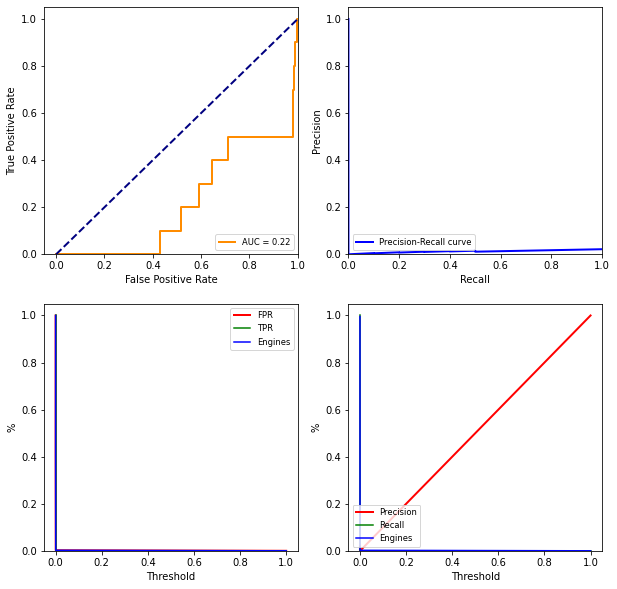

In [131]:
metrics_LogReg, roc_LogReg, prc_LogReg = bin_class_metrics(model, y_test, pred_LogReg.y_pred, pred_LogReg.y_score, print_out=True, plot_out=True)

In [132]:
y_test.value_counts()

0    455
1     10
Name: 10_days, dtype: int64

In [133]:
pred_LogReg.y_pred.value_counts()

0.0    465
Name: y_pred, dtype: int64

In [134]:
model = 'Random Forest B'
clf_rfcb = RandomForestClassifier(n_estimators=50, random_state=42)
gs_params = {'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']}
gs_score = 'roc_auc'

In [135]:
clf_rfcb, pred_rfcb = bin_classify(model, clf_rfcb, X_train, X_test, y_train, y_test, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_rfcb)


Best Parameters:
 RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=50,
                       random_state=42)


-----------------------------------------------------------
Random Forest B 

Confusion Matrix:
[[455   0]
 [ 10   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       455
           1       0.00      0.00      0.00        10

    accuracy                           0.98       465
   macro avg       0.49      0.50      0.49       465
weighted avg       0.96      0.98      0.97       465


Metrics:
           Random Forest B
Accuracy          0.978495
Precision         0.000000
Recall            0.000000
F1 Score          0.000000
ROC AUC           0.680000

ROC Thresholds:

    Threshold  TP  FP  TN  FN  TPR       FPR       TNR       FNR       Que
0    1.203422   0  25  75   0  0.0  0.000000  1.000000  0.750000  0.000000
1    0.203422   0  25  74   0  0.0  0.006593  1.000000  0.747475  0.006452
2    0.183422   0  25  73   1  0.0  0.015385  0.986486  0.744898  0.015054
3    0.163478   0  25  73   1  0.0  0.01

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/g

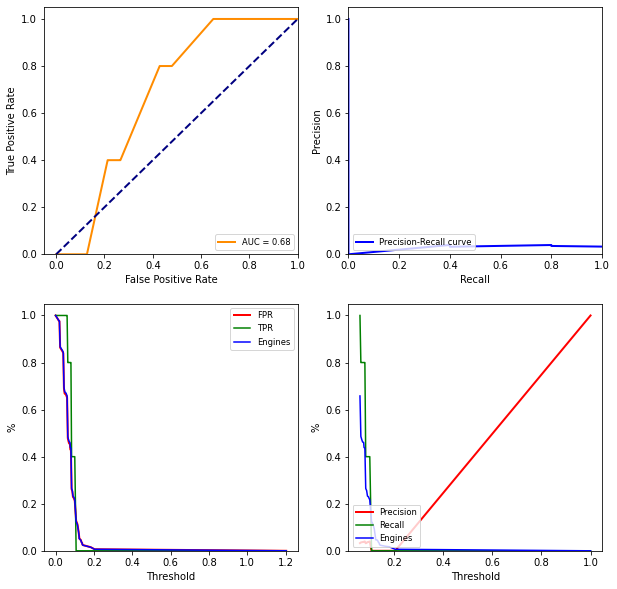

In [136]:
metrics_rfcb, roc_rfcb, prc_rfcb = bin_class_metrics(model, y_test, pred_rfcb.y_pred, pred_rfcb.y_score, print_out=True, plot_out=True)

<AxesSubplot:xlabel='y_score', ylabel='Count'>

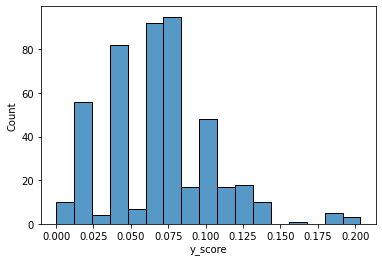

In [137]:
sns.histplot(pred_rfcb['y_score'])

In [138]:
pred_rfcb[250:280]

,y_pred,y_score
250,0.0,0.087166
251,0.0,0.087166
252,0.0,0.083636
253,0.0,0.083636
254,0.0,0.075000
255,0.0,0.043636
256,0.0,0.115000
257,0.0,0.080000
258,0.0,0.100000
259,0.0,0.100000


In [139]:
temp = y_test.to_frame()

In [140]:
temp[temp['10_days'] == 1]

,10_days
257,1
258,1
259,1
260,1
261,1
262,1
263,1
264,1
265,1
266,1
